In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../src/ddG_reg_train.csv')
df_test = pd.read_csv('../src/ddG_reg_test.csv')
df_train.head(5)

,SecSt,ASA_pct,delta_MW,delta_Chg,delta_ARM,delta_Hydro,delta_VdwV,delta_SASA,ddG_calc,ddG_obs
0,2,32.27,14,0.0,0.0,0.118,19,20,0.735,3.000000
1,2,68.05,-2,0.0,0.0,-0.114,-15,-12,0.612,5.050000
2,2,38.92,-1,1.0,0.0,0.208,5,6,-0.835,1.141667
3,4,101.35,-28,-1.0,0.0,0.251,-34,-52,-0.491,-0.263333
4,2,37.46,-16,0.0,0.0,0.257,-6,-13,1.612,1.155000


In [3]:
def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    y = df['ddG_obs']
    return X,y

In [4]:
X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

# Correlation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

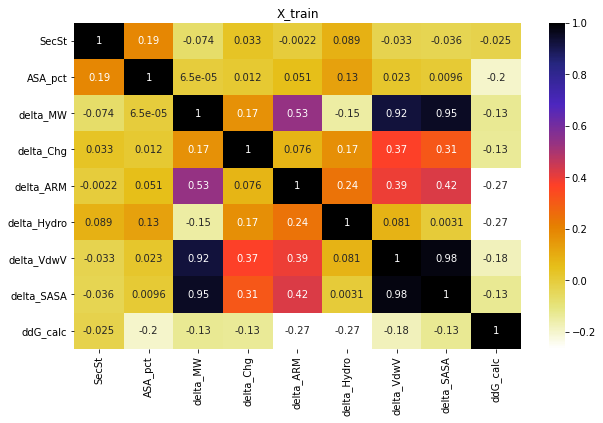

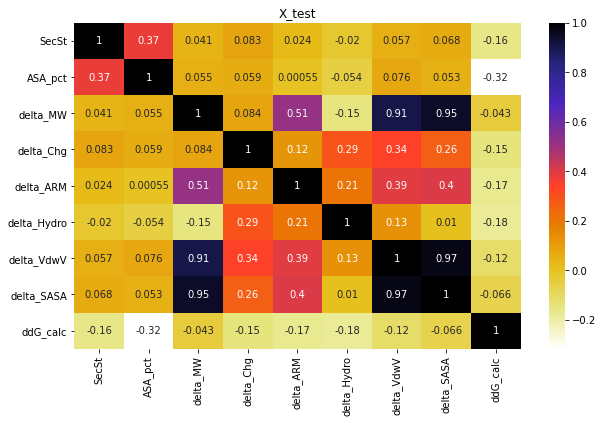

In [6]:
plt.figure(figsize=(10,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_train")
plt.show()

# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated


plt.figure(figsize=(10,6))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_test")
plt.show()


# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated

# SVM Regression

In [7]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

import numpy as np

model = []
cv_r2score = []
test_r2score = []

regr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.32235605179591253


0.3748498879791168


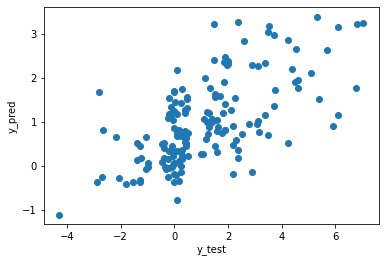

In [8]:
from sklearn.metrics import r2_score
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('SVM')

# Random Forest Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor

regr = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=50, random_state=0))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.3508622458031509


0.42952629445444857


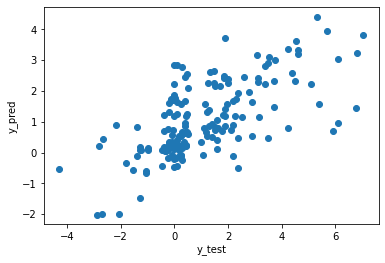

In [10]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('RF')

# KNN Regression

In [11]:
from sklearn.neighbors import KNeighborsRegressor

regr = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.28721369753910736


0.34118815157896554


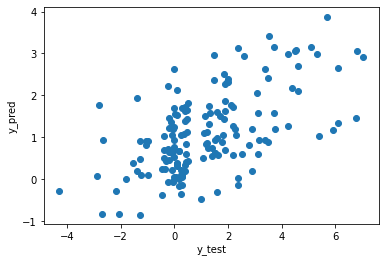

In [12]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('KNN')

# ANN Regression 

In [13]:
from sklearn.neural_network import MLPRegressor

regr = make_pipeline(StandardScaler(), MLPRegressor(max_iter=3000))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.10095288820373413


0.348849587892045


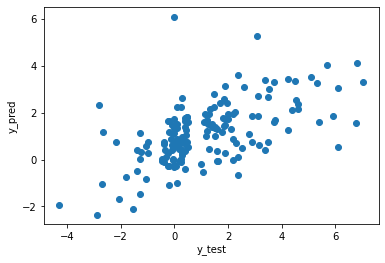

In [14]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('ANN')

# Overall

['SVM', 'RF', 'KNN', 'ANN']
[0.32235605179591253, 0.3508622458031509, 0.28721369753910736, 0.10095288820373413]


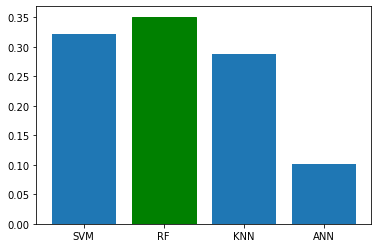

In [17]:
bar_list = plt.bar(model,cv_r2score)
bar_list[1].set_color('green')
print(model)
print(cv_r2score)

['SVM', 'RF', 'KNN', 'ANN']
[0.3748498879791168, 0.42952629445444857, 0.34118815157896554, 0.348849587892045]


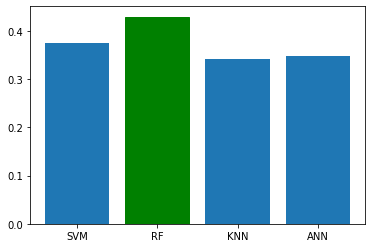

In [18]:
bar_list = plt.bar(model,test_r2score)
bar_list[1].set_color('green')
print(model)
print(test_r2score)